# Table of Contents
 <p>

In [1]:
import numpy as np
import tensorflow as tf

In [2]:
a, b = 1, 0
low=-1; high=1 ; n = 50

trueX = np.random.uniform(low=low, high=high, size=n)
trueY = (a*trueX + b) + np.random.normal(loc=0, scale=.2*max(trueX), size=[len(trueX)])  #stddev = 10%

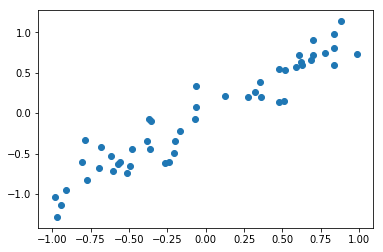

[ 0.62700382  0.88458997 -0.36528703  0.83394207  0.35223496]
[ 0.59191587  1.1342038  -0.44727975  0.80500938  0.38459995]


In [4]:
import matplotlib.pyplot as plt
plt.scatter(trueX, trueY)
plt.show()
plt.close()

print (trueX[0:5])
print (trueY[0:5])

In [5]:
a_guess = 0. ; b_guess = 0.

a = tf.Variable(a_guess)
b = tf.Variable(b_guess)
y = a*trueX + b

In [6]:
loss = tf.reduce_mean(tf.square(y - trueY))   
optimizer = tf.train.GradientDescentOptimizer(0.5)
train = optimizer.minimize(loss)

In [7]:
init = tf.initialize_all_variables()
session = tf.Session()
session.run(init)

Instructions for updating:
Use `tf.global_variables_initializer` instead.


In [9]:
convergenceTolerance = 0.01
previous_a = np.inf
previous_b = np.inf

steps = {}
steps['a'] = []
steps['b'] = []

for k in range(100000):
    _, _a , _b = session.run([train, a, b]) 
    steps['a'].append(_a)
    steps['b'].append(_b)
    if (np.abs(previous_a - _a) or np.abs(previous_b - _b) ) <= convergenceTolerance :
        print ("Finished by Convergence Criterion")
        break
    previous_a = _a, 
    previous_b = _b, 
    
session.close()    

Finished by Convergence Criterion


In [10]:
from matplotlib import pyplot as plt
import matplotlib.animation as animation
from IPython.display import HTML

fig, ax = plt.subplots()
fig.set_tight_layout(True)
#ax.set_xlim((low, high))
#ax.set_ylim((min(trueY), max(trueY)))

x = np.linspace(low, high,n)

def init():
    line = plt.scatter(trueX, trueY)
    return line
    
def animate(i):
    line = plt.plot(x, steps['a'][i]*x + steps['b'][i])
    return line


from tempfile import NamedTemporaryFile
import base64


def anim_to_html(anim):
    VIDEO_TAG = """<video controls> <source src="data:video/x-webm;base64,{0}" type="video/webm"> Your browser does not support the video tag. </video>"""    
    if not hasattr(anim, '_encoded_video'):
        with NamedTemporaryFile(suffix='.webm') as f:
            anim.save(f.name, fps=6, extra_args=['-vcodec', 'libvpx'])
            video = open(f.name, "rb").read()
        anim._encoded_video = base64.b64encode(video)    
    return VIDEO_TAG.format(anim._encoded_video.decode('ascii'))

anim = animation.FuncAnimation(fig=fig, func=animate, init_func=init, frames=len(steps['a']), repeat=True, interval=1000, blit=False)
HTML(anim_to_html(anim))

In [11]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from moviepy.video.io.bindings import mplfig_to_npimage
import moviepy.editor as mpy
from IPython.display import HTML

fig, ax = plt.subplots(1, facecolor='white')
x = np.linspace(low, high, n)
ax.set_xlim((low, high))
ax.set_ylim((min(trueY), max(trueY)))
plt.scatter(trueX, trueY)

def makeFrame(timeStep=1):
    i = int(timeStep)
    plt.plot(x, steps['a'][i]*x + steps['b'][i])  # <= Update the curve
    return mplfig_to_npimage(fig) 

anim = mpy.VideoClip(makeFrame, duration=len(steps['a']))
anim.write_gif("LinearRegression-Animation.gif", fps=.75)
plt.close()
HTML("<img src=LinearRegression-Animation.gif>")

ModuleNotFoundError: No module named 'moviepy'